# House price prediction in Hyderabad

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/soppoju narender/Desktop/Hyderabad.csv")

In [3]:
data.head(10)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,6099000,1230,Nizampet,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7000000,1350,Manikonda,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,4198000,1400,Gachibowli,3,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8,9900000,2240,Tellapur,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9800000,1520,Gachibowli,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(2518, 40)

In [5]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [6]:
data.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [7]:
data.duplicated().sum()

520

In [8]:
data.drop_duplicates()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [9]:
data.nunique()

Price                  690
Area                   579
Location               243
No. of Bedrooms          7
Resale                   2
MaintenanceStaff         3
Gymnasium                3
SwimmingPool             3
LandscapedGardens        3
JoggingTrack             3
RainWaterHarvesting      3
IndoorGames              3
ShoppingMall             3
Intercom                 3
SportsFacility           3
ATM                      3
ClubHouse                3
School                   3
24X7Security             3
PowerBackup              3
CarParking               3
StaffQuarter             3
Cafeteria                3
MultipurposeRoom         3
Hospital                 3
WashingMachine           3
Gasconnection            3
AC                       3
Wifi                     3
Children'splayarea       3
LiftAvailable            3
BED                      3
VaastuCompliant          3
Microwave                3
GolfCourse               3
TV                       3
DiningTable              3
S

In [10]:
data['Location'].unique()

array(['Nizampet', 'Hitech City', 'Manikonda', 'Alwal', 'Kukatpally',
       'Gachibowli', 'Tellapur', 'Kokapet', 'Hyder Nagar', 'Mehdipatnam',
       'Narsingi', 'Khajaguda Nanakramguda Road', 'Madhapur',
       'Puppalaguda', 'Begumpet', 'Banjara Hills', 'AS Rao Nagar',
       'Pragathi Nagar Kukatpally', 'Miyapur', 'Mallampet',
       'Nanakramguda', 'Attapur', 'West Marredpally', 'Kompally',
       'Sri Nagar Colony', 'Hakimpet', 'Pocharam', 'Nagole', 'LB Nagar',
       'Meerpet', 'Kachiguda', 'Masab Tank', 'Kondapur', 'Saroornagar',
       'Uppal Kalan', 'Mallapur', 'Rajendra Nagar', 'Beeramguda',
       'Moosapet', 'Bachupally', 'Toli Chowki', 'Lakdikapul', 'Tarnaka',
       'Kistareddypet', 'Hafeezpet', 'Shaikpet', 'Amberpet', 'Kapra',
       'Trimalgherry', 'Habsiguda', 'Sanath Nagar', 'Darga Khaliz Khan',
       'Kothaguda', 'Balanagar', 'Jubilee Hills', 'raidurgam',
       'Murad Nagar', 'Chandanagar', 'East Marredpally', 'Aminpur',
       'Gajularamaram', 'Serilingampally', 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [12]:
# using correlation statistical method to find the relation between the price and other features
data.corr()['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.829310
No. of Bedrooms        0.614283
Resale                 0.203878
SwimmingPool           0.076059
Gymnasium              0.068763
JoggingTrack           0.065828
ClubHouse              0.062555
24X7Security           0.061210
LandscapedGardens      0.061165
Children'splayarea     0.060944
IndoorGames            0.060358
CarParking             0.055651
RainWaterHarvesting    0.050957
MultipurposeRoom       0.050801
VaastuCompliant        0.049295
Intercom               0.040643
PowerBackup            0.036974
LiftAvailable          0.029536
StaffQuarter           0.019729
SportsFacility         0.018863
MaintenanceStaff       0.013022
Cafeteria              0.008892
AC                     0.005572
ATM                    0.004866
BED                   -0.003700
TV                    -0.005373
Refrigerator          -0.005895
DiningTable           -0.006059
Gasconnection         -0.006604
Wardrobe              -0.006858
WashingM

In [13]:
correlations = data.corr(method='pearson')
target_correlations = correlations['Price']

# Identify features with strong correlations (e.g., absolute correlation > 0.5)
relevant_features = target_correlations[abs(target_correlations) >= 0.5].index

# # Select relevant features from the dataset
selected_features = data[relevant_features]

In [14]:
selected_features 

,Price,Area,No. of Bedrooms
0,6968000,1340,2
1,29000000,3498,4
2,6590000,1318,2
3,5739000,1295,3
4,5679000,1145,2
...,...,...,...
2513,11000000,1460,2
2514,26000000,1314,2
2515,13300000,2625,3
2516,10800000,2050,3


In [15]:
result = pd.concat([selected_features, data['Location']], axis=1)

In [16]:
result

,Price,Area,No. of Bedrooms,Location
0,6968000,1340,2,Nizampet
1,29000000,3498,4,Hitech City
2,6590000,1318,2,Manikonda
3,5739000,1295,3,Alwal
4,5679000,1145,2,Kukatpally
...,...,...,...,...
2513,11000000,1460,2,Nacharam
2514,26000000,1314,2,Manikonda
2515,13300000,2625,3,Madhapur
2516,10800000,2050,3,Hitech City


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le =LabelEncoder()

In [19]:
result['Location'] = le.fit_transform(result['Location'])

In [20]:
result

,Price,Area,No. of Bedrooms,Location
0,6968000,1340,2,162
1,29000000,3498,4,85
2,6590000,1318,2,132
3,5739000,1295,3,9
4,5679000,1145,2,118
...,...,...,...,...
2513,11000000,1460,2,150
2514,26000000,1314,2,132
2515,13300000,2625,3,124
2516,10800000,2050,3,85


In [21]:
data['Location'][0:10]

0       Nizampet
1    Hitech City
2      Manikonda
3          Alwal
4     Kukatpally
5       Nizampet
6      Manikonda
7     Gachibowli
8       Tellapur
9     Gachibowli
Name: Location, dtype: object

In [22]:
result['Location'][0:10]

0    162
1     85
2    132
3      9
4    118
5    162
6    132
7     70
8    212
9     70
Name: Location, dtype: int32

<AxesSubplot:xlabel='Price'>

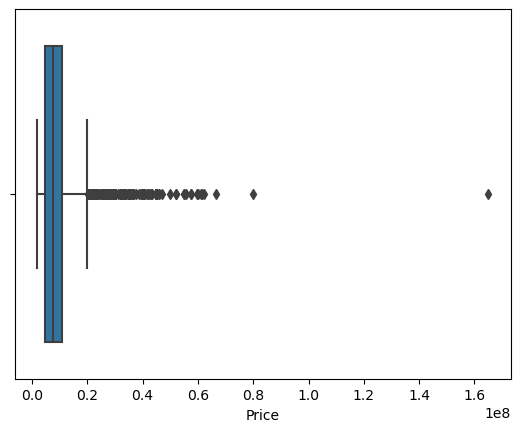

In [23]:
sns.boxplot(result['Price'])

In [24]:
# Outlier treatment for Price

Q1 = result.Price.quantile(0.25)
Q3 = result.Price.quantile(0.75)
IQR = Q3 - Q1
result = result[(result.Price >= Q1 - 1.5*IQR) & (result.Price <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='Price'>

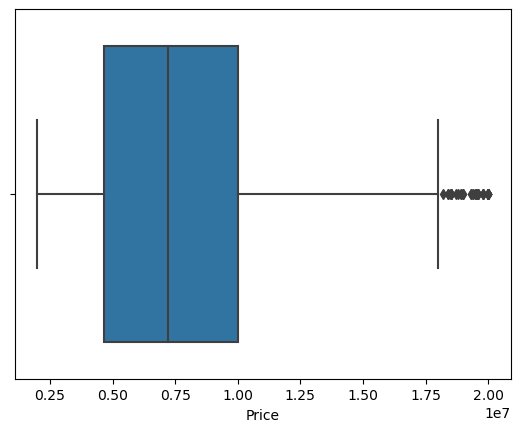

In [25]:
sns.boxplot(result['Price'])

<AxesSubplot:xlabel='Area'>

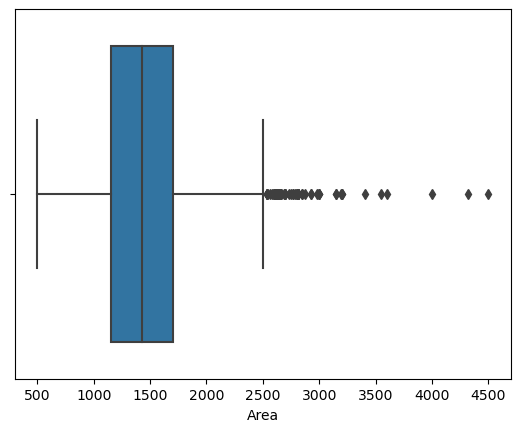

In [26]:
sns.boxplot(result['Area'])

In [27]:
# Outlier treatment for Area

Q1 = result.Area.quantile(0.25)
Q3 = result.Area.quantile(0.75)
IQR = Q3 - Q1
result = result[(result.Area >= Q1 - 1.5*IQR) & (result.Area <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='Area'>

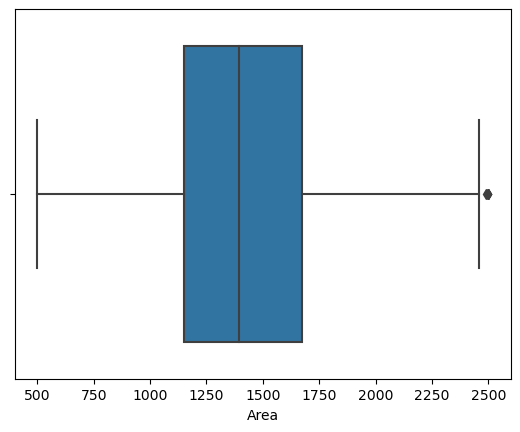

In [28]:
sns.boxplot(result['Area'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = result.drop(columns = 'Price')
y = result['Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [33]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [34]:
#training the model
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6025716278270568

In [67]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
#testing the model
pipe_pred = pipe.predict(X_test)
r2_score(y_test,pipe_pred)

0.6025716278270568

In [37]:
from sklearn.svm import SVR

In [38]:
svr = SVR(kernel='linear')

In [39]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [40]:


svr.score(X_test,y_test)

0.5713110935501111

In [41]:
#testing the model
svr_pred = svr.predict(X_test)
r2_score(y_test,svr_pred)

0.5713110935501111

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rnd = RandomForestRegressor(n_estimators=100, random_state=42)

In [44]:
rnd.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [45]:
rnd.score(X_test,y_test)

0.7357251411828517

In [51]:
#testing the model
rnd_pred = rnd.predict(X_test)
r2_score(y_test,rnd_pred)

0.7357251411828517

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt=DecisionTreeRegressor()

In [48]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
dt.score(X_test,y_test)

0.6489725879038066

In [59]:
#testing the model
dt_pred = dt.predict(X_test)
r2_score(y_test,dt_pred)

0.6489725879038066

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 

In [54]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [55]:
gbr.score(X_test,y_test)

0.7049795813073276

In [56]:
#testing the model
gbr_pred = gbr.predict(X_test)
r2_score(y_test,gbr_pred)

0.7049795813073276

## after Applying basic to advanced algorithms we got 73% by randomforest 
## Note : Due To low amount of data we got less Accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

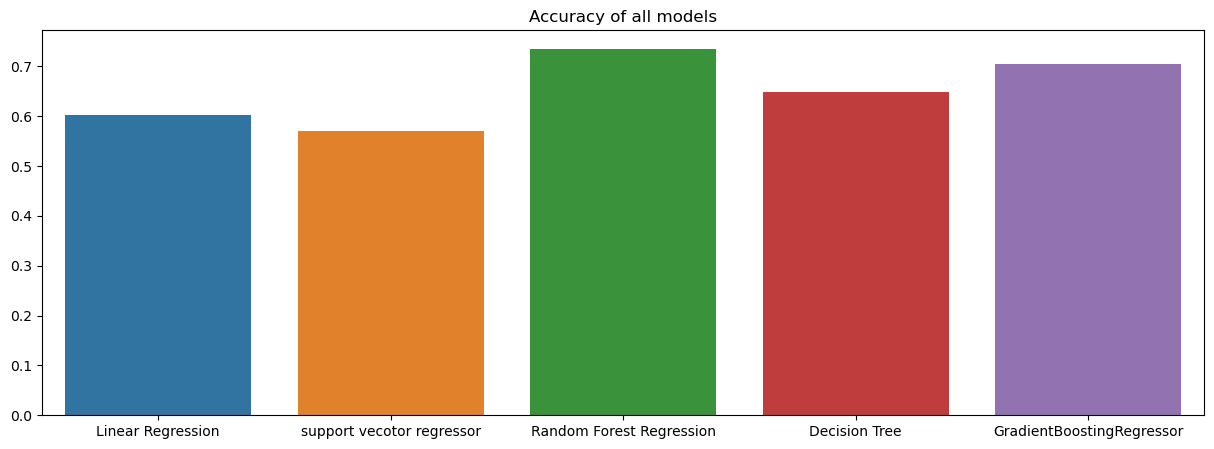

In [65]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=['Linear Regression','support vecotor regressor','Random Forest Regression','Decision Tree','GradientBoostingRegressor'],y=[metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,svr_pred),metrics.r2_score(y_test,rnd_pred),metrics.r2_score(y_test,dt_pred),metrics.r2_score(y_test,gbr_pred)])
ax.set_title('Accuracy of all models')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

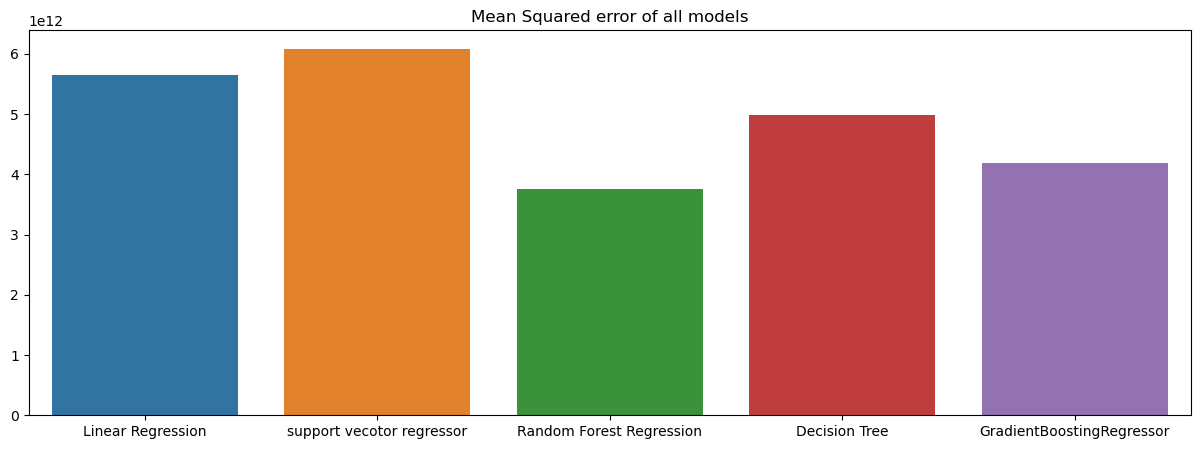

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=['Linear Regression','support vecotor regressor','Random Forest Regression','Decision Tree','GradientBoostingRegressor'],y=[metrics.mean_squared_error(y_test,pipe_pred),metrics.mean_squared_error(y_test,svr_pred),metrics.mean_squared_error(y_test,rnd_pred),metrics.mean_squared_error(y_test,dt_pred),metrics.mean_squared_error(y_test,gbr_pred)])
ax.set_title('Mean Squared error of all models')
plt.show()

## Saving Model

In [73]:
import joblib
joblib.dump(rnd, 'hyd_house_price_model.pkl')

['hyd_house_price_model.pkl']

In [75]:
result

,Price,Area,No. of Bedrooms,Location
0,6968000,1340,2,162
2,6590000,1318,2,132
3,5739000,1295,3,9
4,5679000,1145,2,118
5,6099000,1230,2,162
...,...,...,...,...
2511,4000000,1060,2,220
2512,6200000,1000,1,150
2513,11000000,1460,2,150
2516,10800000,2050,3,85


In [74]:
model = joblib.load("C:/Users/soppoju narender/hyd_house_price_model.pkl")

## Prediction

In [89]:
#predicting the price using random forest regression
price = model.predict([[1805,3,85]])
print('The price of the house is $',price[0])

The price of the house is $ 11314036.666666664


In [117]:
data['Location'].unique()

array(['Nizampet', 'Hitech City', 'Manikonda', 'Alwal', 'Kukatpally',
       'Gachibowli', 'Tellapur', 'Kokapet', 'Hyder Nagar', 'Mehdipatnam',
       'Narsingi', 'Khajaguda Nanakramguda Road', 'Madhapur',
       'Puppalaguda', 'Begumpet', 'Banjara Hills', 'AS Rao Nagar',
       'Pragathi Nagar Kukatpally', 'Miyapur', 'Mallampet',
       'Nanakramguda', 'Attapur', 'West Marredpally', 'Kompally',
       'Sri Nagar Colony', 'Hakimpet', 'Pocharam', 'Nagole', 'LB Nagar',
       'Meerpet', 'Kachiguda', 'Masab Tank', 'Kondapur', 'Saroornagar',
       'Uppal Kalan', 'Mallapur', 'Rajendra Nagar', 'Beeramguda',
       'Moosapet', 'Bachupally', 'Toli Chowki', 'Lakdikapul', 'Tarnaka',
       'Kistareddypet', 'Hafeezpet', 'Shaikpet', 'Amberpet', 'Kapra',
       'Trimalgherry', 'Habsiguda', 'Sanath Nagar', 'Darga Khaliz Khan',
       'Kothaguda', 'Balanagar', 'Jubilee Hills', 'raidurgam',
       'Murad Nagar', 'Chandanagar', 'East Marredpally', 'Aminpur',
       'Gajularamaram', 'Serilingampally', 

In [119]:
result['Location'].unique()

array([162, 132,   9, 118,  70, 212, 107,  87, 139, 158, 103, 124, 180,
        39,   1, 177, 142, 130, 155,  19, 228,  85,  33, 111, 206,  81,
       175, 151, 120, 138, 134, 113, 197, 221, 131, 184,  37, 145,  24,
       216, 121, 211, 106,  80, 201,  11,  99, 218,  79, 194,  59, 114,
        30, 241, 148,  48,  68,  14,  71, 199, 129, 141,  94, 225, 112,
        76, 152, 117,  42, 233, 126,  74,  51,  53, 154,  45,  32,  40,
       205, 159,  16,  10, 224, 147,  73,  98, 150,  15, 182, 181, 192,
        97,  43, 101,  72, 220,  49,  84, 189,  52,  86,  65,  67,  66,
       183, 186, 213, 133,  96, 179, 167, 170,  22, 238, 176, 232, 157,
       109,  25, 164,   5,  17, 135, 178, 166,  82, 165, 149,   4, 140,
        13,   0, 104, 137,  58, 208, 136, 144,  46,  75,  26, 119,  18,
        35, 127,  27, 239,  21, 209,  88,  23, 153,  89, 187,   6, 168,
       161, 125, 143, 240, 108,  78, 214,  55,  90,  56,  57, 172, 171,
        93,   8,   7, 235,  38, 173, 100, 110, 210,  47, 230, 10

In [120]:
Locations = ['Nizampet', 'Hitech City', 'Manikonda', 'Alwal', 'Kukatpally',
       'Gachibowli', 'Tellapur', 'Kokapet', 'Hyder Nagar', 'Mehdipatnam',
       'Narsingi', 'Khajaguda Nanakramguda Road', 'Madhapur',
       'Puppalaguda', 'Begumpet', 'Banjara Hills', 'AS Rao Nagar',
       'Pragathi Nagar Kukatpally', 'Miyapur', 'Mallampet',
       'Nanakramguda', 'Attapur', 'West Marredpally', 'Kompally',
       'Sri Nagar Colony', 'Hakimpet', 'Pocharam', 'Nagole', 'LB Nagar',
       'Meerpet', 'Kachiguda', 'Masab Tank', 'Kondapur', 'Saroornagar',
       'Uppal Kalan', 'Mallapur', 'Rajendra Nagar', 'Beeramguda',
       'Moosapet', 'Bachupally', 'Toli Chowki', 'Lakdikapul', 'Tarnaka',
       'Kistareddypet', 'Hafeezpet', 'Shaikpet', 'Amberpet', 'Kapra',
       'Trimalgherry', 'Habsiguda', 'Sanath Nagar', 'Darga Khaliz Khan',
       'Kothaguda', 'Balanagar', 'Jubilee Hills', 'raidurgam',
       'Murad Nagar', 'Chandanagar', 'East Marredpally', 'Aminpur',
       'Gajularamaram', 'Serilingampally', 'Malkajgiri', 'Mettuguda',
       'Venkat Nagar Colony', 'Kondakal', 'Gopanpally', 'Somajiguda',
       'Nallagandla Gachibowli', 'Krishna Reddy Pet', 'Bolarum',
       'Zamistanpur', 'Madhura Nagar', 'Ghansi Bazaar', 'Chintalakunta',
       'Chinthal Basthi', 'Nallakunta', 'Bowenpally', 'Bandlaguda Jagir',
       'Boduppal', 'Neknampur', 'Appa Junction Peerancheru',
       'Ambedkar Nagar', 'Vanasthalipuram', 'Moula Ali', 'Gandipet',
       'Nacharam', 'Appa Junction', 'Qutub Shahi Tombs', 'Abids',
       'Dilsukh Nagar', 'Quthbullapur', 'Sainikpuri', 'KTR Colony',
       'Bollaram', 'Karmanghat', 'Gajulramaram Kukatpally', 'Uppal',
       'Cherlapalli', 'Himayat Nagar', 'Rhoda Mistri Nagar', 'Chintalmet',
       'Hitex Road', 'ECIL', 'Boiguda', 'ECIL Main Road',
       'ECIL Cross Road', 'Rajbhavan Road Somajiguda',
       'Ramachandra Puram', 'TellapurOsman Nagar Road', 'Mansoorabad',
       'KRCR Colony Road', 'Pragati Nagar', 'Padmarao Nagar',
       'Paramount Colony Toli Chowki', 'BK Guda Internal Road',
       'muthangi', 'Pragathi Nagar', 'Yapral', 'Narayanguda', 'Kollur',
       'Bachupally Road', 'Old Bowenpally', 'Alapathi Nagar',
       'Arvind Nagar Colony', 'Matrusri Nagar', 'Pragathi Nagar Road',
       'Padma Colony', 'Happy Homes Colony', 'Old Nallakunta',
       'Sangeet Nagar', 'NRSA Colony', 'Adibatla', 'Methodist Colony',
       'Ameerpet', 'ALIND Employees Colony', 'Khizra Enclave', 'Medchal',
       'Dammaiguda', 'Suchitra', 'Whitefields', 'Mayuri Nagar',
       'Adda Gutta', 'Miyapur HMT Swarnapuri Colony',
       'Central Excise Colony Hyderabad', 'Basheer Bagh', 'Gopal Nagar',
       'Bachupaly Road Miyapur', 'Kushaiguda', 'Ashok Nagar',
       'Barkatpura', 'Madinaguda', 'Bagh Amberpet', 'new nallakunta',
       'BHEL', 'Sun City', 'Hydershakote', 'BK Guda Road',
       'Nallagandla Road', 'IDPL Colony', 'Ramnagar Gundu',
       'Alkapur township', 'Banjara Hills Road Number 12',
       'Panchavati Colony Manikonda', 'New Maruthi Nagar',
       'Madhavaram Nagar Colony', 'Miyapur Bachupally Road',
       'nizampet road', 'Kokapeta Village', 'HMT Hills', 'Tilak Nagar',
       'Chititra Medchal', 'Isnapur', 'D D Colony', 'DD Colony',
       'Patancheru Shankarpalli Road', 'Patancheru', 'Jhangir Pet',
       'Almasguda', 'Allwyn Colony', 'financial District',
       'Beeramguda Road', 'Pati', 'Karimnagar', 'Kollur Road',
       'Sun City Padmasri Estates', 'Chaitanyapuri', 'Nandagiri Hills',
       'Whitefield', 'Film Nagar', 'Kismatpur', 'Dr A S Rao Nagar Rd',
       'Dullapally', 'KPHB', 'Vivekananda Nagar Colony', 'Ameenpur',
       'Chintradripet', 'Ring Road', 'Saket', 'Kavuri Hills', 'manneguda',
       'Moti Nagar', 'Usman Nagar', 'Shadnagar', 'Bongloor',
       'Mailardevpally', 'Uppalguda', 'Tirumalgiri', 'Chikkadapally',
       'JNTU', 'hyderabad', 'Shamshabad', 'Srisailam Highway',
       'Domalguda', 'Lingampalli', 'Residential Flat Machavaram',
       'Whisper Valley', 'Tukkuguda Airport View Point Road',
       'Santoshnagar', 'Tolichowki', 'Domalguda Road', 'Shankarpalli',
       'Kothapet', 'Baghlingampally', 'Picket', 'Safilguda',
       'Sikh Village', 'Neredmet', 'Macha Bolarum', 'Kowkur',
       'Rakshapuram', 'west venkatapuram', 'Vidyanagar Adikmet',
       'Aushapur', 'Old Alwal', 'Secunderabad Railway Station Road',
       'Balapur', 'Hastinapur', 'chandrayangutta',
       'Balaji Hills Colony Venkatraya Nagar', 'Janachaitanya Colony',
       'Gurramguda', 'Paradise Circle']

In [121]:
labels = [162, 132,   9, 118,  70, 212, 107,  87, 139, 158, 103, 124, 180,
        39,   1, 177, 142, 130, 155,  19, 228,  85,  33, 111, 206,  81,
       175, 151, 120, 138, 134, 113, 197, 221, 131, 184,  37, 145,  24,
       216, 121, 211, 106,  80, 201,  11,  99, 218,  79, 194,  59, 114,
        30, 241, 148,  48,  68,  14,  71, 199, 129, 141,  94, 225, 112,
        76, 152, 117,  42, 233, 126,  74,  51,  53, 154,  45,  32,  40,
       205, 159,  16,  10, 224, 147,  73,  98, 150,  15, 182, 181, 192,
        97,  43, 101,  72, 220,  49,  84, 189,  52,  86,  65,  67,  66,
       183, 186, 213, 133,  96, 179, 167, 170,  22, 238, 176, 232, 157,
       109,  25, 164,   5,  17, 135, 178, 166,  82, 165, 149,   4, 140,
        13,   0, 104, 137,  58, 208, 136, 144,  46,  75,  26, 119,  18,
        35, 127,  27, 239,  21, 209,  88,  23, 153,  89, 187,   6, 168,
       161, 125, 143, 240, 108,  78, 214,  55,  90,  56,  57, 172, 171,
        93,   8,   7, 235,  38, 173, 100, 110, 210,  47, 230, 105,  63,
        64,  95, 227,  12,  54, 190, 193, 237, 146, 223, 200,  44, 128,
       222, 215,  50,  91, 236,  61, 122, 188, 229, 219, 196, 217,  62,
       203, 115,  28, 174, 191, 204, 160, 123, 116, 185, 242, 226,  20,
       163, 198,  31,  83, 234,  29,  60,  92,  77, 169]

In [122]:
location_mapping = dict(zip(Locations, labels))

In [123]:
location_mapping

{'Nizampet': 162,
 'Hitech City': 132,
 'Manikonda': 9,
 'Alwal': 118,
 'Kukatpally': 70,
 'Gachibowli': 212,
 'Tellapur': 107,
 'Kokapet': 87,
 'Hyder Nagar': 139,
 'Mehdipatnam': 158,
 'Narsingi': 103,
 'Khajaguda Nanakramguda Road': 124,
 'Madhapur': 180,
 'Puppalaguda': 39,
 'Begumpet': 1,
 'Banjara Hills': 177,
 'AS Rao Nagar': 142,
 'Pragathi Nagar Kukatpally': 130,
 'Miyapur': 155,
 'Mallampet': 19,
 'Nanakramguda': 228,
 'Attapur': 85,
 'West Marredpally': 33,
 'Kompally': 111,
 'Sri Nagar Colony': 206,
 'Hakimpet': 81,
 'Pocharam': 175,
 'Nagole': 151,
 'LB Nagar': 120,
 'Meerpet': 138,
 'Kachiguda': 134,
 'Masab Tank': 113,
 'Kondapur': 197,
 'Saroornagar': 221,
 'Uppal Kalan': 131,
 'Mallapur': 184,
 'Rajendra Nagar': 37,
 'Beeramguda': 145,
 'Moosapet': 24,
 'Bachupally': 216,
 'Toli Chowki': 121,
 'Lakdikapul': 211,
 'Tarnaka': 106,
 'Kistareddypet': 80,
 'Hafeezpet': 201,
 'Shaikpet': 11,
 'Amberpet': 99,
 'Kapra': 218,
 'Trimalgherry': 79,
 'Habsiguda': 194,
 'Sanath Nag

In [136]:
text_location = 'Lingampalli'

label_encoded_location = location_mapping.get(text_location, -1)


In [137]:
# Predicting the price using random forest regression


label_encoded_location = location_mapping.get(text_location, -1)

# Check if the location exists in the mapping
if label_encoded_location == -1:
    print("Location not found in the mapping")
else:
    price = model.predict([[1500, 5, label_encoded_location]])
    print('The price of the house is $', price[0])

    

The price of the house is $ 7206980.0
